# Task 9

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
data = np.load('Data/circle_data_2.npy')

# Transpose data and populate
points = data.T
x_points = points[:, 0]
y_points = points[:, 1]

In [11]:
# Construct the A matrix and b vector for least-squares
N = len(points)
A = np.ones((N, 3))
b = np.zeros(N)

for i in range(N):
    x = x_points[i]
    y = y_points[i]
    A[i, 1] = -2 * x
    A[i, 2] = -2 * y
    b[i] = -(x**2 + y**2)

A

array([[ 1.        ,  0.60721856, -2.60408459],
       [ 1.        ,  0.33982651, -4.38092575],
       [ 1.        ,  1.16049453, -3.36620147],
       [ 1.        , -0.0780188 , -2.4253186 ],
       [ 1.        ,  2.17924904, -4.05486258],
       [ 1.        ,  1.69231062, -3.64585752],
       [ 1.        ,  0.5766407 , -3.61049075],
       [ 1.        ,  1.60545435, -3.49810561],
       [ 1.        , -0.284779  , -2.16366008],
       [ 1.        , -0.31581394, -1.78224265],
       [ 1.        , -0.58372803, -2.94724784],
       [ 1.        ,  0.75580651, -2.2883948 ],
       [ 1.        ,  0.29504014, -2.58004499],
       [ 1.        ,  1.52593379, -4.30074077],
       [ 1.        ,  0.65641337, -3.5243452 ],
       [ 1.        , -0.07201994, -2.46427999],
       [ 1.        ,  2.34062549, -4.00511344],
       [ 1.        ,  0.12565157, -1.76100424],
       [ 1.        ,  0.45167276, -3.42321379],
       [ 1.        , -0.27008116, -2.01015738],
       [ 1.        ,  1.24274947, -4.537

LS Center: (-0.4464, 1.5046)
LS Radius: 0.5930


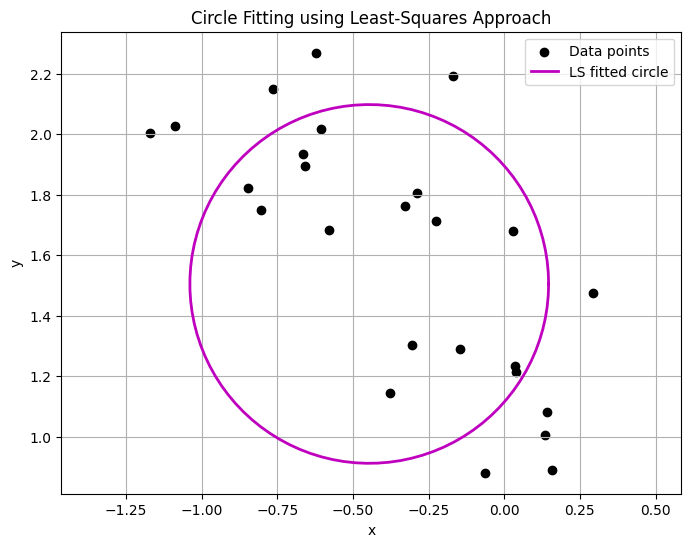

In [12]:
# Solve the least-squares problem
solution, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Extract the solution
y_star = solution[0]
c_ls_x = solution[1]
c_ls_y = solution[2]
c_ls = np.array([c_ls_x, c_ls_y])

# Calculate the radius
R_ls = np.sqrt(np.linalg.norm(c_ls)**2 - y_star)

print(f"LS Center: ({c_ls_x:.4f}, {c_ls_y:.4f})")
print(f"LS Radius: {R_ls:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot the fitted circle
theta = np.linspace(0, 2*np.pi, 100)
circle_x = c_ls_x + R_ls * np.cos(theta)
circle_y = c_ls_y + R_ls * np.sin(theta)
plt.plot(circle_x, circle_y, 'm-', linewidth=2, label='LS fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting using Least-Squares Approach')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()